# **Data 100 Final Project**


### **Contributors:** Eric Cheng, Arbaaz Muslim, Kevin Liu


As part of our final project, we decided to investigate the factors contributing to the number of deaths in an individual city or state for the novel coronavirus (COVID-19). **Our overarching goal was to model the  number of deaths based on demographic factors including but not limited to number of hospitals, number of people in a certain age group, and population.**


We begin by importing the relevant packages and the data sets. Our analysis is based on the deaths/per day dataset, cases/per day dataset from John Hopkins University (latest data used until May 7th). We also included data from the Yu group for demographic details from each city/county.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
deaths = pd.read_csv("https://raw.githubusercontent.com/kevinliu002/data100_proj/master/deaths.csv")
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,86,86,92,94,95,97,97,99,99,102
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,4,4,4,4


In [102]:
demographics = pd.read_csv("https://raw.githubusercontent.com/kevinliu002/data100_proj/master/demographics.csv")
demographics.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


# **Data Cleaning: Making Our Dataframe**

We want to see how the demographics of a particular city or county affect the mortality rate. As such, we inner join the deaths and demographics data set. Before we inner join, let's make sure that the columns we are joining on do not have NAN values. It appears that some states have NAN values, so we imported another manually constructed csv file with StateName corresponding to each state. We focused only on the 50 states and excluded other territories from our analysis (Virgin Islands, American Samoa, and Puerto Rico).


In [103]:
supplemental_data = pd.read_csv("https://raw.githubusercontent.com/kevinliu002/data100_proj/master/supplemental_data.csv")
demographics = demographics.merge(supplemental_data,how ="outer",left_on="StateName",right_on="StateName")
demographics = demographics.drop(columns=['State_x'])

In [104]:
supplemental_data.head()

,State,StateName
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [105]:
death_and_demo = deaths.merge(demographics, how = 'inner', left_on = ['Admin2', 'Province_State'], right_on = ['CountyName', 'State_y']).drop_duplicates()
death_and_demo.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,State_y
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,Alabama
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN,Alabama
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0,Alabama
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0,Alabama
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0,Alabama


Our data cleaning will follow the **5 data properties** involved in exploratory data analysis: **structure, granularity, scope, temporality, and faithfulness**.

We begin by improving the structure of the dataframe by only keeping the relevant columns in our data analysis: 

 

*   Right off the bat, we can see that *iso2, iso3, Country_Region, and code3* are redundant as we only focus on counties within the USA. We will drop those columns.
*   At this time, we will keep the individual columns representing the cummulative deaths per day. 
*   We also see that countyFIPS, STATEFP, COUNTYFP, StateName, Province_State,CensusRegionName, CensusDivisionName, Rural-UrbanContinumCode2013, and CountyName, Lat, Long_, and #HospParticipatinginNetwork2017 are also either duplicates of other columns or unrelated to our analysis. We will drop these columns as well.
*   Many of the other columns tell us important information about the demographics so we will keep them as is for now.






In [106]:
death_and_demo = death_and_demo.drop(labels=['iso2','iso3','code3','FIPS','UID','Country_Region','countyFIPS','CountyName','Combined_Key',
                                             'STATEFP','COUNTYFP','StateName','Province_State','CensusRegionName','CensusDivisionName',
                                             'Rural-UrbanContinuumCode2013','#HospParticipatinginNetwork2017','Lat',"Long_"],axis = 1)


Our structure has improved, but we still have 188 columns. Looking at the different mortality rates & population for each column, we proceed to group them for easier handling and analysis.



1.   Our analysis will not depend on the mortality rate for any population of a particular age averaged over 2015-2017. Because this is not useful data, we will drop all the columns containing this information. 
2.   We have several columns containing the population of the county. Because the demographical data is from the 2010 census, we focus on CensusPopulation2010 but will also keep PopulationEstimate2018 in case it is needed for any other predictions.

3.  The columns are also quite granular when determining ages. It separates ages every 5 years and by gender. For better analysis we will group them simply by age group (and not by gender, since this information is available in another column).

4.  We will group by age groups following usage seen in CDC and WHO reports. A child is someone of age 0-9 years, an adolescent is 10-19 years, and adults are of ages 20+.

5. We will further break down the adult age into a "Young" category for ages 20-34, a "Middle" category for ages 35-54, and an "Elderly" category for ages 60+. These are based on definitions from studies conducted by the NIH. This breakdown is also limited by the granularity of our dataset as the data is less granular from 35-44 than from 30-34. 






In [107]:
death_and_demo = death_and_demo.drop(labels=['Population','3-YrMortalityAge<1Year2015-17','3-YrMortalityAge1-4Years2015-17',
                                             '3-YrMortalityAge5-14Years2015-17','3-YrMortalityAge15-24Years2015-17',
                                             '3-YrMortalityAge25-34Years2015-17','3-YrMortalityAge35-44Years2015-17',
                                             '3-YrMortalityAge45-54Years2015-17','3-YrMortalityAge55-64Years2015-17',
                                             '3-YrMortalityAge65-74Years2015-17','3-YrMortalityAge75-84Years2015-17',
                                             '3-YrMortalityAge85+Years2015-17'],axis=1)
death_and_demo.head()

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,State_y
0,Autauga,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,Alabama
1,Baldwin,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN,Alabama
2,Barbour,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0,Alabama
3,Bibb,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0,Alabama
4,Blount,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0,Alabama


Here, we rename a column for clarity.

In [108]:
death_and_demo.insert(1,'County',death_and_demo["Admin2"])
death_and_demo = death_and_demo.drop(columns=["Admin2"],axis = 1)
death_and_demo.head()

,County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,State_y
0,Autauga,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,Alabama
1,Baldwin,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN,Alabama
2,Barbour,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0,Alabama
3,Bibb,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0,Alabama
4,Blount,0,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0,Alabama


Before we group data together, it is important to realize how many NAN or invalid values we have.

In [109]:
nan_table = death_and_demo.isna().sum().to_frame()
display(nan_table)

,0
County,0
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
1/27/20,0
1/28/20,0
1/29/20,0
1/30/20,0


Fortunately, the population columns we want to add have no NAN values.

Unfortunately, the following columns have a nontrivial number of NAN values:


*   3-YrDiabetes2015-17 at 1660
*   mortality2015-17Estimated at 2934
*   stay at home at 486
*   50 gatherings at 117
*   500 gatherings at 117
*   entertainment/gym at 65
*   Anything HPSA related at 1038
*   Dem to Rep ratio with around ~30

We will deal with the NAN values in the 3-YrDiabetes column by simply dropping this column and using DiabetesPercentage which has 0 NAN values and contains roughly the same information, with a few age restrictions.

We are not going to use anything HPSA related or mortality2015-17Estimated, so we can drop them.

The stay at home orders and other actions regarding closures will need to be handled in another section.

Let's now group the age population data first, as they have no NAN values.



In [110]:
death_and_demo['Child_2010'] = death_and_demo[['PopMale<52010','PopFmle<52010','PopMale5-92010','PopFmle5-92010']].sum(axis = 1)

death_and_demo['Adolescent_2010'] = death_and_demo[['PopMale10-142010','PopFmle10-142010','PopMale15-192010','PopFmle15-192010']].sum(axis = 1)

death_and_demo['Young_Adult_2010'] = death_and_demo[['PopMale20-242010','PopFmle20-242010','PopMale25-292010',
                                                'PopFmle25-292010','PopMale30-342010','PopFmle30-342010']].sum(axis = 1)

death_and_demo["Middle_Adult_2010"] = death_and_demo[['PopMale35-442010','PopFmle35-442010','PopMale45-542010',
                                                 'PopFmle45-542010','PopMale55-592010','PopFmle55-592010']].sum(axis = 1)

death_and_demo["Elderly_2010"] = death_and_demo[['PopMale60-642010','PopFmle60-642010','PopMale65-742010',
                                                 'PopFmle65-742010','PopMale75-842010','PopFmle75-842010',
                                                 'PopMale>842010','PopFmle>842010']].sum(axis = 1)  

death_and_demo  = death_and_demo.drop(columns = ['PopMale<52010','PopFmle<52010','PopMale5-92010','PopFmle5-92010',
                               'PopMale10-142010','PopFmle10-142010','PopMale15-192010','PopFmle15-192010',
                               'PopMale20-242010','PopFmle20-242010','PopMale25-292010',
                               'PopFmle25-292010','PopMale30-342010','PopFmle30-342010',
                               'PopMale35-442010','PopFmle35-442010','PopMale45-542010',
                               'PopFmle45-542010','PopMale55-592010','PopFmle55-592010',
                               'PopMale60-642010','PopFmle60-642010','PopMale65-742010',
                               'PopFmle65-742010','PopMale75-842010','PopFmle75-842010',
                               'PopMale>842010','PopFmle>842010'])



We now remove some other redundant columns that also had a nontrival amount of NAN values.

In [111]:
death_and_demo = death_and_demo.drop(labels=["3-YrDiabetes2015-17","mortality2015-17Estimated","HPSAShortage","HPSAServedPop","HPSAUnderservedPop"], axis = 1)

The Democratic to Republican ratio also had a number of NAN values. Upon investigation, the majority of those values were from rural counties in Alaska. Domain research led us to find that many rural counties in Alaska have no political preference. Imputing this feature with a value of 0 would be incorrect, since it would imply that the counties are overwhelmingly Republican. For this reason,
we filled in the NAN values with a value of 1, indicating an even split between Democratic and Republican party preferences. Technically speaking, if both parties have no presence, they have the same amount of presence (a 1:1 ratio).

In [112]:
death_and_demo["dem_to_rep_ratio"].fillna(1,inplace=True)

Handling the stay at home, gatherings, and gym columns is tricky. The easy way out is to simply drop those columns, but we would be neglecting a nontrivial amount of our data. Let's look at why we have so many NAN values for the stay at home order column.

In [113]:
stay_at_home = death_and_demo[['County','State_y','stay at home']] 
stay_at_home = stay_at_home[stay_at_home['stay at home'].isnull()]
stay_at_home['State_y'].unique()

array(['Arkansas', 'Iowa', 'Nebraska', 'North Dakota', 'Oklahoma',
       'South Dakota', 'Utah', 'Missouri'], dtype=object)

According to the LA Times, as of April 22nd, 2020 the following states do not have stay at home orders:
Arkansas, Iowa, Nebraska, North Dakota, South Dakota, Oklahoma, Utah, and Wyoming. It appears the states that do not have a stay at home order have NAN values for the corresponding column. 



Likewise, we can look at the states/counties that have NAN values for limits on gatherings.

In [114]:
gathering_limits = death_and_demo[['County','State_y','>50 gatherings']] 
gathering_limits = stay_at_home[gathering_limits['>50 gatherings'].isnull()]
gathering_limits['State_y'].unique()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array(['North Dakota', 'South Dakota', 'Missouri'], dtype=object)

It appears that of the states that didn't have stay at home orders, North Dakota and South Dakota also didn't have limits on gathering. Repeating the same analysis for gyms/entertainment, we see that South Dakota didn't have restrictions on gyms or entertainment venues. 



In [115]:
entertainment_limits = death_and_demo[['County','State_y','entertainment/gym']] 
entertainment_limits = entertainment_limits[entertainment_limits['entertainment/gym'].isnull()]
entertainment_limits['State_y'].unique()

array(['South Dakota', 'Missouri'], dtype=object)

Given this insight, we will now treat the NAN values in the stay at home, entertainment/gym, and gathering columns as is for now (leaving them as NAN) while also dropping values that have NANs in the rest of the columns. The columns that had NANS (SVI Percentile, Stroke Mortality, and others involving demographics) had a combined total representing less than 2% of our data. It is difficult to calculate those values directly, so we will drop those from our dataset as they represent only a trivial amount of our data.

We finish our data cleaning by dropping those rows as needed and renaming a column for clarification.

In [116]:
death_and_demo = death_and_demo.drop(labels = ['lat','lon','federal guidelines','foreign travel ban'],axis = 1)
death_and_demo = death_and_demo.dropna(subset=['POP_LATITUDE','POP_LONGITUDE','PopulationEstimate2018',
                                          'PopTotalMale2017','PopTotalFemale2017','FracMale2017',
                                          'PopulationEstimate65+2017','PopulationDensityperSqMile2010',
                                          'CensusPopulation2010','MedianAge2010','#EligibleforMedicare2018',
                                          'MedicareEnrollment,AgedTot2017','DiabetesPercentage','HeartDiseaseMortality',
                                          'StrokeMortality','Smokers_Percentage','RespMortalityRate2014','#FTEHospitalTotal2017',
                                          "TotalM.D.'s,TotNon-FedandFed2017","#Hospitals","#ICU_beds","SVIPercentile"])


In [117]:
death_and_demo.insert(1,'State',death_and_demo[['State_y']])
death_and_demo.head()

,County,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,State_y,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
0,Autauga,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.4354,Alabama,7570.0,8580.0,9567.0,19531.0,9323.0
1,Baldwin,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.2162,Alabama,22757.0,23526.0,30405.0,62997.0,42580.0
2,Barbour,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.9959,Alabama,3344.0,3330.0,5612.0,9463.0,5708.0
3,Bibb,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.6003,Alabama,2783.0,2983.0,4740.0,8169.0,4240.0
4,Blount,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.4242,Alabama,7496.0,8117.0,9984.0,19704.0,12021.0


In [118]:
nan_table = death_and_demo.isna().sum().to_frame()
display(nan_table)

,0
County,0
State,0
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
1/27/20,0
1/28/20,0
1/29/20,0


#### ***Our data cleaning is now complete. To summarize:***


*   **Structure:** Our dataframe is now more structurally sound as we removed unnecessary or duplicate columns. We also renamed columns as appropriate and rearranged the order as needed.
*   **Granularity:** The dataframe has over 3,000 rows representing the various counties across the United States. Because we have a sufficent amount of data, we can say with high confidence that our data is granular enough, even if we excluded small territories like Saipan.
*  **Scope:** Our dataframe contains many demographical details and is sufficent in terms of scope.
*   **Temporality**: We are working with demographical data from the 2010 census as well as population estimates from 2017. As such, we will be cautious to not mix and match columns from 2010 and from 2017 in our model or analysis. *Note that we will also be working with the most up to date data from JHU regarding number of deaths*
*   **Faithfulness**: Some columns containing a lot of NANs were simply dropped because the columns were irrelevant. Others were manually inspected and filled in appropriately (for example, we replaced NANs in the State column with the appropriate State Name based on the abbreviation). Our data is overall very faithful, and any remaining NANs such as those present in stay at home orders make logical sense.

# **Data Analysis & Modeling**

Restating our goal, we want to model the number of deaths in a county based on the demographics of the county. 

We start our analysis by doing a test-train split.

In [119]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(death_and_demo, test_size=0.2, random_state=42)

In [120]:
train

,County,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,State_y,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
1621,Cedar,Nebraska,0,0,0,0,0,0,0,0,...,737503.0,737519.0,737519.0,0.0121,Nebraska,1197.0,1250.0,1133.0,2950.0,2322.0
2451,Robertson,Tennessee,0,0,0,0,0,0,0,0,...,737504.0,737507.0,737507.0,0.4287,Tennessee,9463.0,9139.0,12305.0,23929.0,11447.0
1980,Richland,North Dakota,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737503.0,0.1217,North Dakota,1978.0,2454.0,3049.0,5592.0,3248.0
7,Calhoun,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.8252,Alabama,14725.0,16326.0,23809.0,39637.0,24075.0
698,Fayette,Indiana,0,0,0,0,0,0,0,0,...,737503.0,737501.0,737501.0,0.6108,Indiana,3149.0,3264.0,3912.0,8359.0,5593.0
1434,Walthall,Mississippi,0,0,0,0,0,0,0,0,...,737504.0,737509.0,737509.0,0.8611,Mississippi,2186.0,2293.0,2719.0,4871.0,3374.0
1884,Halifax,North Carolina,0,0,0,0,0,0,0,0,...,737500.0,737501.0,737507.0,0.9646,North Carolina,6711.0,7381.0,8975.0,19206.0,12418.0
418,Dooly,Georgia,0,0,0,0,0,0,0,0,...,737502.0,737504.0,737504.0,0.9484,Georgia,1739.0,1781.0,2968.0,5401.0,3029.0
2426,Lauderdale,Tennessee,0,0,0,0,0,0,0,0,...,737504.0,737507.0,737507.0,0.9672,Tennessee,3728.0,3720.0,5951.0,9522.0,4894.0
2972,Columbia,Wisconsin,0,0,0,0,0,0,0,0,...,737502.0,737501.0,737501.0,0.1204,Wisconsin,7048.0,7428.0,9456.0,21195.0,11706.0


In [121]:
test

,County,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,State_y,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
1212,Clare,Michigan,0,0,0,0,0,0,0,0,...,737500.0,737500.0,737500.0,0.7720,Michigan,3378.0,3864.0,4601.0,10634.0,8449.0
258,Garfield,Colorado,0,0,0,0,0,0,0,0,...,737507.0,737504.0,737501.0,0.3510,Colorado,8842.0,7701.0,12062.0,20339.0,7445.0
2376,Walworth,South Dakota,0,0,0,0,0,0,0,0,...,737500.0,737507.0,NaN,0.3939,South Dakota,660.0,651.0,747.0,1703.0,1677.0
177,Alameda,California,0,0,0,0,0,0,0,0,...,737503.0,737499.0,737499.0,0.4701,California,192198.0,191464.0,335253.0,544756.0,246600.0
213,San Diego,California,0,0,0,0,0,0,0,0,...,737503.0,737499.0,737499.0,0.5596,California,397452.0,423811.0,741672.0,1031642.0,500736.0
414,Dade,Georgia,0,0,0,0,0,0,0,0,...,737502.0,737504.0,737504.0,0.5156,Georgia,1861.0,2477.0,3178.0,5689.0,3428.0
52,Pickens,Alabama,0,0,0,0,0,0,0,0,...,737500.0,737503.0,737512.0,0.9207,Alabama,2435.0,2712.0,3241.0,6798.0,4560.0
268,Lake,Colorado,0,0,0,0,0,0,0,0,...,737507.0,737504.0,737501.0,0.4452,Colorado,1038.0,977.0,1636.0,2625.0,1034.0
482,Paulding,Georgia,0,0,0,0,0,0,0,0,...,737502.0,737504.0,737504.0,0.1376,Georgia,23696.0,23100.0,27002.0,52529.0,15997.0
1297,Faribault,Minnesota,0,0,0,0,0,0,0,0,...,737502.0,737501.0,737501.0,0.1570,Minnesota,1640.0,1864.0,2123.0,4839.0,4087.0


# Data Visualizations
After we split the dataset into the training and test set, we want to see which features are most useful to predict the number of deaths per county. The results of this analysis will not only answer one of our motivating questions, but will also (hopefully) provide a subset of features that we can use for regression.

In order to determine which features are most useful to predict the number of deaths, we begin by making educated guesses based off of visualizations. We then confirm or deny our guesses by running a LASSO regressor on our training set, which will push the coefficients of comparatively irrelevant features to 0 and will maintain nonzero coefficients for more important features.

Let's create a line plot of the timeseries of all the counties in New Jersey in the training set.

First, let's find all the counties.

In [122]:
new_jersey = train[train['State'] == 'New Jersey']
new_jersey.head()

,County,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,State_y,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
1744,Salem,New Jersey,0,0,0,0,0,0,0,0,...,737502.0,737500.0,737500.0,0.5901,New Jersey,7965.0,9285.0,11048.0,23638.0,14147.0
1745,Somerset,New Jersey,0,0,0,0,0,0,0,0,...,737502.0,737500.0,737500.0,0.1000,New Jersey,41725.0,45569.0,51017.0,128081.0,57052.0
1738,Mercer,New Jersey,0,0,0,0,0,0,0,0,...,737502.0,737500.0,737500.0,0.5580,New Jersey,44347.0,51182.0,74340.0,131007.0,65637.0
1736,Hudson,New Jersey,0,0,0,0,0,0,0,0,...,737502.0,737500.0,737500.0,0.6424,New Jersey,76192.0,70504.0,179623.0,213781.0,94166.0
1740,Monmouth,New Jersey,0,0,0,0,0,0,0,0,...,737502.0,737500.0,737500.0,0.1605,New Jersey,75883.0,89595.0,99045.0,242048.0,123809.0


Second, let's orient the dataframe into a graphable format where all the dates are in one column and all the counties are in the other columns.

In [123]:
new_jersey_to_graph = new_jersey.iloc[:, :109].drop(columns=['State']).melt(id_vars=['County'], var_name=['Date']).pivot_table(values=['value'], index=['Date'], columns=['County']).reindex(new_jersey.keys()[2:109])
new_jersey_to_graph.columns = new_jersey_to_graph.columns.droplevel()
new_jersey_to_graph.head()

County,Atlantic,Bergen,Burlington,Camden,Cumberland,Essex,Gloucester,Hudson,Hunterdon,Mercer,Middlesex,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Union,Warren
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finally, let's graph the line plot.

Text(0, 0.5, 'Number of Deaths')

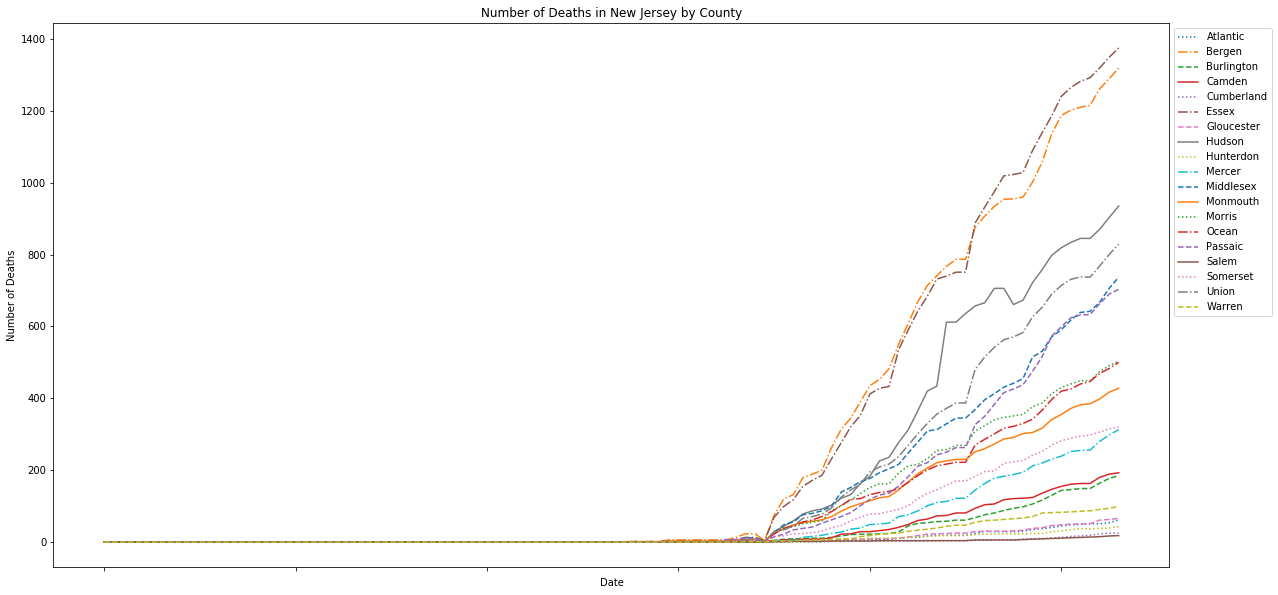

In [124]:
plt.rcParams['figure.figsize'] = [20, 10]
linestyle = []
for i in range(int(len(new_jersey_to_graph.keys()) / 4) + 1):
  linestyle.extend([':', '-.', '--', '-'])

new_jersey_to_graph.plot(style=linestyle)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Number of Deaths in New Jersey by County')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')

By looking at this visualization, we can see that Essex and Bergen are the two counties in New Jersey that have the most deaths. Intuition led us to hypothesize that a larger population would mean that more deaths would occur. Thus, we decided to shift our perspective, looking at the counties by population instead of death count. 

Text(0, 0.5, 'Population Count')

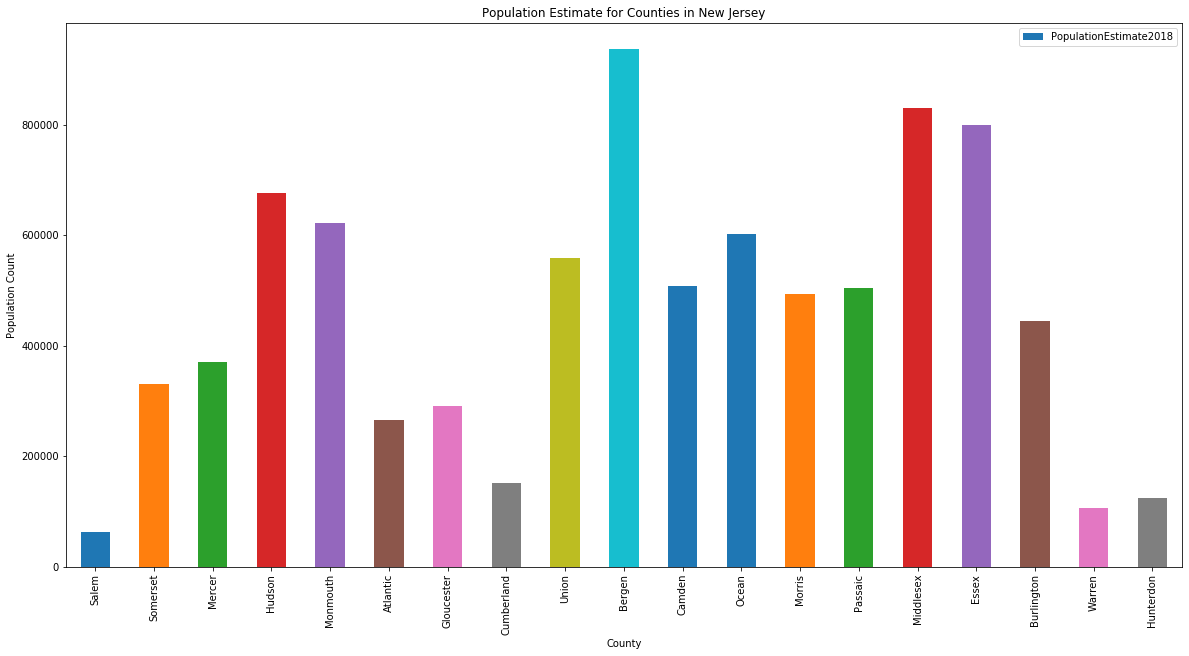

In [125]:
new_jersey_pop = new_jersey[['County', 'PopulationEstimate2018']]
new_jersey_pop.plot('County', 'PopulationEstimate2018', kind='bar')
plt.title("Population Estimate for Counties in New Jersey")
plt.ylabel("Population Count")

With Bergen being the most populated county and Essex being the third most populated county in 2018, we thought population would be an important factor for predicting the number of deaths in a county.

We decided to also look at a correlation map of our training set in order to determine which features would be most important for determining the death count. It's clear from the first column below that the population density is very useful in predicting the death count.

The correlation map below also illustrates another motivation for using LASSO regression: many features are correlated with each other, and LASSO regression can help us solve this issue of collinearity. By fixing this issue, our LASSO model (and its coefficients) will be more reliably interpretable.

In [126]:
train_X = train.drop(['County', 'State', 'State_y'], axis=1)
train_X = train_X.drop(train_X.keys()[:106].values, axis=1)
corr = train_X.corr()
corr.style.background_gradient(cmap='coolwarm')

,5/7/20,POP_LATITUDE,POP_LONGITUDE,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#Hospitals,#ICU_beds,dem_to_rep_ratio,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
5/7/20,1,0.0174063,0.0631751,0.244987,0.243434,0.25108,-0.0499415,0.266618,0.763192,0.251371,-0.036403,0.26346,0.266067,-0.0419502,-0.0401774,-0.0846497,-0.0662601,-0.0964669,0.438415,0.467035,0.230798,0.322016,0.296707,-0.0728047,-0.0576205,-0.0425036,-0.0137221,-0.0460958,-0.0477814,0.00211811,0.211566,0.21042,0.279816,0.251185,0.271786
POP_LATITUDE,0.0174063,1,-0.266354,-0.059738,-0.0582729,-0.058974,0.101375,-0.0652668,0.0134411,-0.0528565,0.191283,-0.062067,-0.0587442,-0.344579,-0.379284,-0.409842,-0.174908,-0.223425,-0.0216875,-0.0230939,-0.0252807,-0.0632814,-0.0156798,-0.487831,0.176444,0.250383,-0.0692394,-0.132327,-0.169452,-0.489398,-0.0590115,-0.0550164,-0.0503092,-0.0483492,-0.0570927
POP_LONGITUDE,0.0631751,-0.266354,1,0.0181285,0.015518,0.0221376,-0.235306,0.0402211,0.0966358,0.0233117,0.0369938,0.0450211,0.0395623,0.231879,0.215729,0.133478,0.246702,0.10331,0.0544955,0.0427765,-0.0338452,0.0392818,0.0513035,0.125929,-0.104592,-0.0279035,-0.224087,-0.120833,0.0195867,-0.000299993,0.00691823,0.0145544,0.0115384,0.0292812,0.0465542
PopulationEstimate2018,0.244987,-0.059738,0.0181285,1,0.999887,0.999767,-0.124884,0.983288,0.342706,0.998415,-0.183059,0.985226,0.984627,-0.0887589,-0.136483,-0.11246,-0.185205,-0.216278,0.884903,0.914049,0.933201,0.915361,0.376443,-0.178286,-0.122952,-0.0960767,-0.0337329,-0.127181,-0.112904,0.0264665,0.995046,0.994531,0.992169,0.997343,0.982036
PopTotalMale2017,0.243434,-0.0582729,0.015518,0.999887,1,0.999575,-0.120792,0.982585,0.340524,0.998567,-0.18281,0.984308,0.984032,-0.0884894,-0.135886,-0.11304,-0.185241,-0.215433,0.88269,0.912553,0.932931,0.912921,0.374438,-0.179515,-0.122328,-0.0952906,-0.0329878,-0.127292,-0.11355,0.0266559,0.995291,0.994965,0.992568,0.99754,0.981439
PopTotalFemale2017,0.25108,-0.058974,0.0221376,0.999767,0.999575,1,-0.128347,0.984252,0.353824,0.998952,-0.181195,0.985977,0.985425,-0.0877644,-0.134367,-0.1123,-0.18341,-0.216574,0.887457,0.916761,0.932523,0.916889,0.380953,-0.178371,-0.123749,-0.0958736,-0.0345334,-0.127088,-0.112317,0.027429,0.994561,0.994458,0.993044,0.997787,0.983621
FracMale2017,-0.0499415,0.101375,-0.235306,-0.124884,-0.120792,-0.128347,1,-0.142534,-0.0883485,-0.125133,-0.0128518,-0.150575,-0.144916,-0.07859,-0.0570954,-0.121444,-0.00622438,0.0096809,-0.13704,-0.127854,-0.132163,-0.14655,-0.150247,-0.0376881,-0.00314848,-0.00985238,0.0504214,0.00910797,-0.0911143,0.0282628,-0.120829,-0.121927,-0.113289,-0.125127,-0.143081
PopulationEstimate65+2017,0.266618,-0.0652668,0.0402211,0.983288,0.982585,0.984252,-0.142534,1,0.353811,0.984699,-0.141881,0.998146,0.999,-0.0979728,-0.144924,-0.131917,-0.18928,-0.230639,0.871743,0.912019,0.920071,0.910776,0.377901,-0.181208,-0.141753,-0.0998753,-0.0545212,-0.139943,-0.119914,0.0199689,0.967309,0.972578,0.967503,0.985145,0.998536
PopulationDensityperSqMile2010,0.763192,0.0134411,0.0966358,0.342706,0.340524,0.353824,-0.0883485,0.353811,1,0.347749,-0.0923541,0.348783,0.344421,-0.0439281,-0.0530059,-0.118649,-0.087138,-0.15354,0.501719,0.509683,0.275801,0.368482,0.501354,-0.106602,-0.0901683,-0.0691442,-0.0232857,-0.0707873,-0.0739457,0.0237747,0.313883,0.302706,0.387662,0.341861,0.360078
CensusPopulation2010,0.251371,-0.0528565,0.0233117,0.998415,0.998567,0.998952,-0.125133,0.984699,0.347749,1,-0.177698,0.986459,0.986601,-0.0854548,-0.129407,-0.111571,-0.179398,-0.212497,0.88761,0.9

Below, we graph a scatter plot of the population density versus the death count. This plot visually confirms the high correlation displayed above in the correlation map.

Text(0.5, 0, 'Population Density')

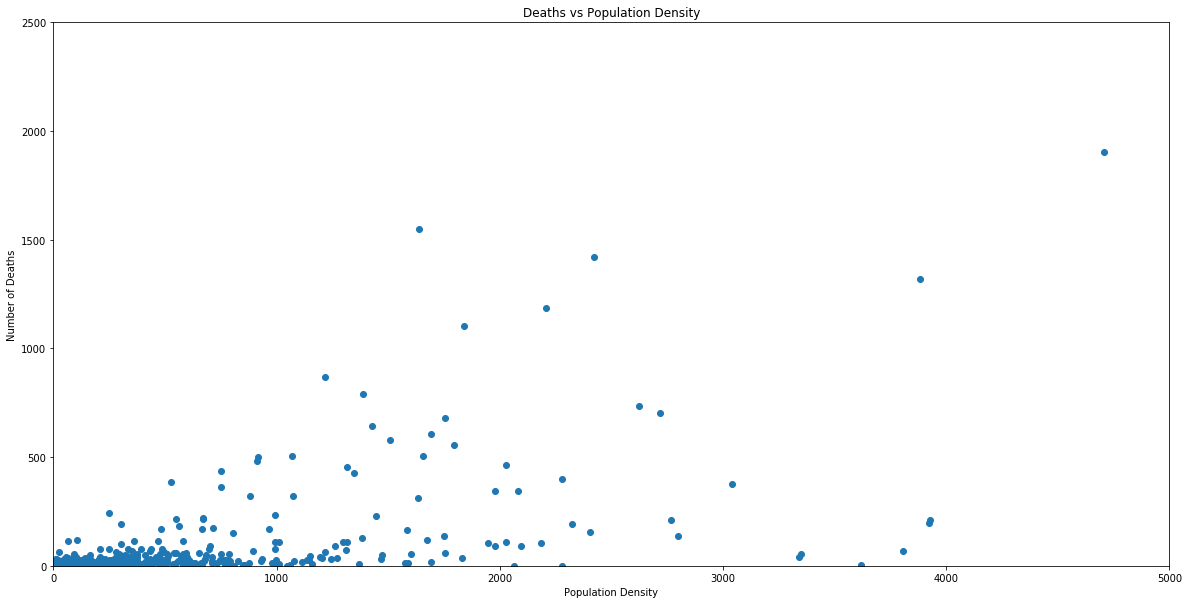

In [127]:
plt.scatter(train['PopulationDensityperSqMile2010'], train['5/7/20'])
plt.xlim(0, 5000)
plt.ylim(0, 2500)
plt.title("Deaths vs Population Density")
plt.ylabel("Number of Deaths")
plt.xlabel("Population Density")

In the below cell, we drop all columns corresponding to death counts on earlier dates. In an earlier iteration of this notebook, we neglected to do so. This led our LASSO model to use the death count for May 6th to predict the death count on May 7th, ignoring all other features. 

In [128]:
death_and_demo = death_and_demo.drop(death_and_demo.keys()[4:108], axis =1)
death_and_demo = death_and_demo.drop(columns=['1/22/20','1/23/20'])

In [129]:
death_and_demo.head()

,County,State,5/7/20,POP_LATITUDE,POP_LONGITUDE,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,...,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,State_y,Child_2010,Adolescent_2010,Young_Adult_2010,Middle_Adult_2010,Elderly_2010
0,Autauga,Alabama,3,32.500389,-86.494165,55601.0,27007.0,28497.0,0.486578,8392.0,...,737500.0,737503.0,737512.0,0.4354,Alabama,7570.0,8580.0,9567.0,19531.0,9323.0
1,Baldwin,Alabama,5,30.548923,-87.762381,218022.0,103225.0,109403.0,0.485472,42413.0,...,737500.0,737503.0,737512.0,0.2162,Alabama,22757.0,23526.0,30405.0,62997.0,42580.0
2,Barbour,Alabama,1,31.844036,-85.310038,24881.0,13335.0,11935.0,0.527701,4757.0,...,737500.0,737503.0,737512.0,0.9959,Alabama,3344.0,3330.0,5612.0,9463.0,5708.0
3,Bibb,Alabama,0,33.030921,-87.127659,22400.0,12138.0,10530.0,0.535469,3632.0,...,737500.0,737503.0,737512.0,0.6003,Alabama,2783.0,2983.0,4740.0,8169.0,4240.0
4,Blount,Alabama,0,33.955243,-86.591491,57840.0,28607.0,29406.0,0.493114,10351.0,...,737500.0,737503.0,737512.0,0.4242,Alabama,7496.0,8117.0,9984.0,19704.0,12021.0


We now split the output variable from the input variables.

In [130]:
train_Y = train_X["5/7/20"]
train_X.drop("5/7/20", axis=1, inplace=True)

Before we set up a pipeline for our LASSO model, we must check for NAN values. 

In [131]:
train_X.isna().any()

POP_LATITUDE                        False
POP_LONGITUDE                       False
PopulationEstimate2018              False
PopTotalMale2017                    False
PopTotalFemale2017                  False
FracMale2017                        False
PopulationEstimate65+2017           False
PopulationDensityperSqMile2010      False
CensusPopulation2010                False
MedianAge2010                       False
#EligibleforMedicare2018            False
MedicareEnrollment,AgedTot2017      False
DiabetesPercentage                  False
HeartDiseaseMortality               False
StrokeMortality                     False
Smokers_Percentage                  False
RespMortalityRate2014               False
#FTEHospitalTotal2017               False
TotalM.D.'s,TotNon-FedandFed2017    False
#Hospitals                          False
#ICU_beds                           False
dem_to_rep_ratio                    False
stay at home                         True
>50 gatherings                    

Since all features that have NAN values correspond to dates when government mandates were put into effect, we realized we could use the same imputation value for all of the columns. From our research in the EDA phase, we learned that NAN values in date-related features corresponded to counties or states where the mandate in question still hasn't been put into effect. Therefore, it wouldn't make sense to impute with a value of 0, since this would mean that the counties put orders into place the earliest. For this reason, we found our imputation value by finding the latest date when an order had been put into place and added 100 to it. 

In [132]:
most_recent_date = train_X[["stay at home", ">50 gatherings", ">500 gatherings", "entertainment/gym"]].max().max()
null_date_val = most_recent_date + 100

# Feature Selection and Model Interpretation

Now that we've determined a suitable imputation value, we fit our LASSO model pipeline below. We iterate over 500 alpha values in order to find the one with the lowest cross-validation error, with the $R^2$ value as our metric. We choose this as our metric because in this phase, we are focusing on creating a model that is interpretable. The LASSO model also has high values for its tolerance and maximum iterations parameters. In an earlier iteration of this notebook, we ran the pipeline without these arguments and got numerous ConvergenceWarnings. In addition to these warnings, our "best" model had a negative $R^2$ value. We added these arguments in order to resolve these issues.   

The best performing alpha value is 307.3066132264529


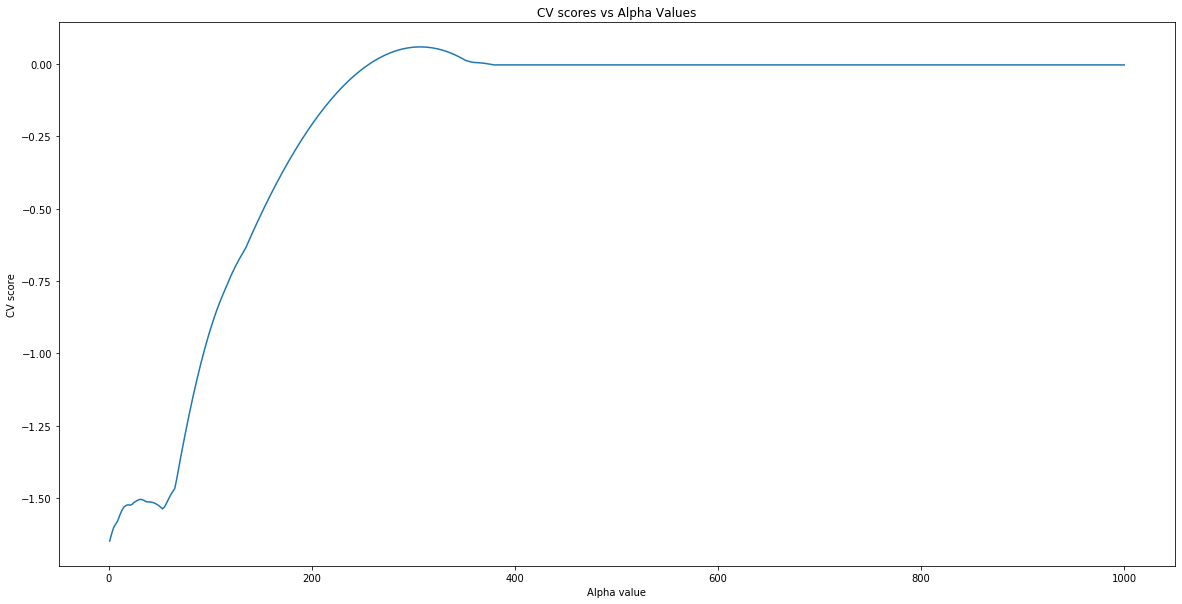

In [133]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

lasso_models = {}

alphas = np.linspace(1,1000,500)
cv_scores = []
for a in alphas:
    lasso_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), train_X.keys().values)
    ])),
    ("Imputation", SimpleImputer(strategy="constant", fill_value=null_date_val)),
    ("LinearModel", Lasso(alpha=a, tol=100000, max_iter=100000))
    ])
    cv_scores.append(cross_val_score(lasso_model, train_X, train_Y, cv=5).mean())
    lasso_models[str(a)] = lasso_model

best_alpha = str(alphas[np.argmax(cv_scores)])
plt.plot(alphas, cv_scores)
plt.title("CV scores vs Alpha Values")
plt.xlabel("Alpha value")
plt.ylabel("CV score")
print("The best performing alpha value is " + best_alpha)

We see that the best performing alpha value is about 307, which struck us as rather high. We reran this exact process with ElasticNet as well to see if it would produce a smaller alpha value, but instead received the exact same alpha value as output. Our trial with ElasticNet is not included in this notebook to reduce clutter and repetition.

Below, we fit our best performing LASSO model to our training data so that the model can determine its coefficients.

In [134]:
best_lasso_model_pipeline = lasso_models[best_alpha]
best_lasso_model_pipeline.fit(train_X, train_Y)

Pipeline(memory=None,
         steps=[('SelectColumns',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('keep',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  array(['POP_LATITUDE', 'POP_LONGITUDE', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstima...
                ('Imputation',
                 SimpleImputer(add_indicator=False, copy=True,
                               fill_value=737622.0, missing_values=nan,
                               strategy='constant', verbose=0)),
                ('Linear

Now that our LASSO model has been fit to our training data, we can finally see which factors play large roles in determining the death count in a county.

We start by listing all of the coefficient values, which are mostly 0, as expected. We then list the names of the features whose coefficients are relatively far from 0, followed by their coefficient values. It is important to note that the listed features are not all equally as relevant. Their relative importances can be determined through their coefficients.

In [135]:
best_lasso_model_pipeline["LinearModel"].coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  7.86842633e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.86629194e-05, -1.08064030e-06,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.63978983e-09,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [136]:
kept = ~np.isclose(best_lasso_model_pipeline["LinearModel"].coef_, 0)
train_X.keys().values[kept]

array(['PopulationDensityperSqMile2010', 'stay at home', '>50 gatherings'],
      dtype=object)

In [137]:
best_lasso_model_pipeline["LinearModel"].coef_[kept]

array([ 7.86842633e+00, -3.86629194e-05, -1.08064030e-06])

# Regression

We now begin the regression phase of our project, in which we use the data in order to predict the death count in a county.

We begin by moving away from our previous $R^2$ metric and instead, using the root mean squared error, since its units are more interpretable.

We also define a function to compare different models.

In [138]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))

In [139]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

def compare_models(models):
    training_rmse = [rmse_score(model, train_X, train_Y) for model in models.values()]
    validation_rmse = [np.mean(cross_val_score(model, train_X, train_Y, scoring=rmse_score, cv=5)) 
                       for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = training_rmse, name="Training RMSE"),
        go.Bar(x = names, y = validation_rmse, name="CV RMSE")])
    fig.update_yaxes(title="RMSE")
    fig.update_xaxes(title="Models")
    
    return fig

We begin our development of a regression model by testing four different models: A decision tree regressor, a random forest regressor, and 2 SVMs, each with a different kernel. 

In [140]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {}

for m in [DecisionTreeRegressor(), RandomForestRegressor(), SVR(), SVR(kernel="linear")]:
    name = type(m).__name__

    if name == "SVR":
      name += m.get_params()["kernel"]

    model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), train_X.keys().values)
    ])),
    ("Imputation", SimpleImputer(strategy="constant", fill_value=null_date_val)),
    ("RegressionModel", m)
    ])
    model.fit(train_X, train_Y);
    models[name] = model


/srv/app/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



We compare the four models below.

In [141]:
compare_models(models)

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled feat

The error from the SVM regressor using a linear kernel dominates the error graph, so we plot the error again after removing it.

In [142]:
models.pop("SVRlinear")
compare_models(models)

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/srv/app/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled feat

From the above graph, we have more insight about which model we should continue to tune. The decision tree regressor has the highest cross validation error and is therefore taken out of consideration. Of the remaining models, the random forest regressor seems to follow the classic pattern of overfitting, with a lower train error and a higher cross validation error. Since we know that the random forest model can benefit from some form of regularization, we continue onwards with it.

When we read through the documentation for the random forest regressor, two arguments to the model caught our attention: the max_depth and n_estimators arguments. We realized that testing smaller values for either argument would serve as a proxy for a regularization term and would reduce overfitting. We chose to tune the n_estimators argument.

Trying 10 estimators...
Trying 35 estimators...
Trying 60 estimators...
Trying 85 estimators...
Trying 110 estimators...
Trying 135 estimators...
Trying 160 estimators...
Trying 185 estimators...
Trying 210 estimators...
Trying 235 estimators...
The best performing n_estimators value is 110


Text(0.5, 0, 'n_estimators value')

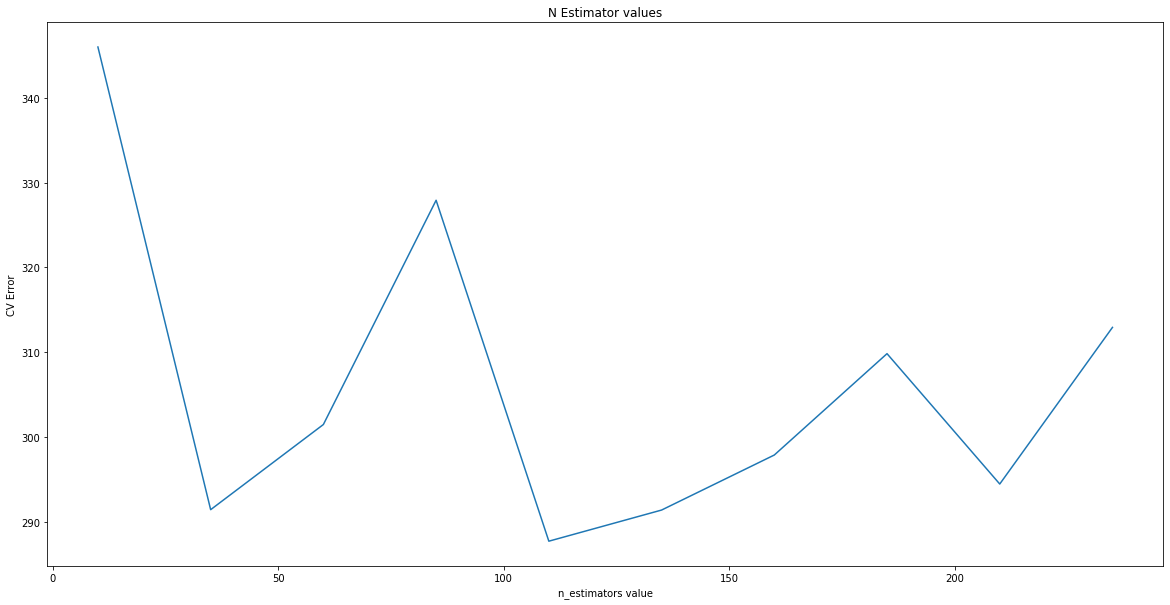

In [143]:
rf_models = {}

n_estimators = np.arange(10,250,25)
n_estimators_cv_scores = []
for n in n_estimators:
    print("Trying " + str(n) + " estimators...")
    rf_model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", StandardScaler(), train_X.keys().values)
    ])),
    ("Imputation", SimpleImputer(strategy="constant", fill_value=null_date_val)),
    ("RandomForest", RandomForestRegressor(n_estimators=n))
    ])
    n_estimators_cv_scores.append(cross_val_score(rf_model, train_X, train_Y, scoring=rmse_score, cv=5).mean())
    rf_models[str(n)] = rf_model
    

best_n_estimators = str(n_estimators[np.argmin(n_estimators_cv_scores)])
plt.plot(n_estimators, n_estimators_cv_scores)
print("The best performing n_estimators value is " + best_n_estimators)
plt.title("N Estimator values")
plt.ylabel("CV Error")
plt.xlabel("n_estimators value")

In [144]:
final_model = rf_models[best_n_estimators]
final_model.fit(train_X,train_Y)
print(rmse_score(final_model,test[train_X.keys()],test['5/7/20']))

160.60383081571754


Now that our random forest model has been fit, we can circle back to our initial question about which features are most useful in predicting death count, thanks to the feature importances attribute.

In [145]:
forest_features = final_model['RandomForest'].feature_importances_
kept = ~np.isclose(forest_features, 0)
most_important_features = train_X.keys().values[kept]
most_important_features

array(['POP_LATITUDE', 'POP_LONGITUDE', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014',
       '#FTEHospitalTotal2017', "TotalM.D.'s,TotNon-FedandFed2017",
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'stay at home',
       '>50 gatherings', '>500 gatherings', 'public schools',
       'restaurant dine-in', 'entertainment/gym', 'SVIPercentile',
       'Child_2010', 'Adolescent_2010', 'Young_Adult_2010',
       'Middle_Adult_2010', 'Elderly_2010'], dtype=object)

In [146]:
forest_features[kept]

array([2.50017633e-02, 4.38627382e-02, 2.27701754e-03, 2.07245444e-03,
       2.39977487e-03, 3.89921542e-03, 2.82185119e-03, 4.81264067e-01,
       6.81493884e-03, 2.79328252e-03, 4.78156743e-03, 7.03262384e-03,
       6.54513110e-03, 4.38254321e-03, 4.92723089e-03, 8.90244698e-03,
       1.22646337e-01, 5.80147069e-02, 5.44388006e-02, 4.12568048e-03,
       7.07915365e-03, 3.95959688e-02, 1.56585182e-02, 1.11603900e-03,
       2.55273952e-03, 2.93590044e-04, 2.42311544e-03, 9.40397341e-04,
       5.20398709e-03, 6.57487360e-03, 1.12112356e-02, 8.16252565e-03,
       2.40005958e-02, 2.61830880e-02])

Text(0.5, 1.0, 'Features in Random Forest Model')

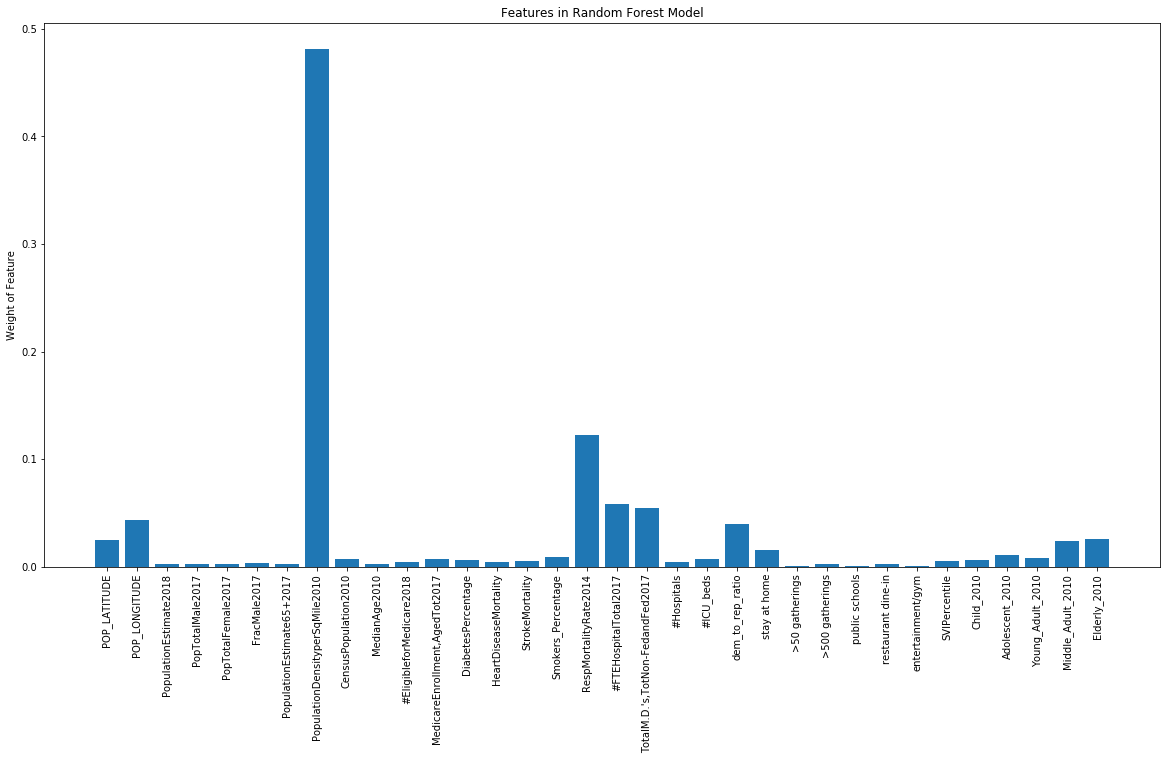

In [147]:
plt.bar(np.arange(0,len(most_important_features)),forest_features)
plt.xticks(np.arange(0,len(most_important_features)),most_important_features,rotation='vertical')
plt.ylabel("Weight of Feature")
plt.title("Features in Random Forest Model")

We can see that this model agrees with our previous one with respect to the overwhelming importance of population density. However, it is important to note that our interpretation of the random forest model is not as reliable since collinearity was not accounted for.

In conclusion, we can see that population density is the key factor here. All other factors pale in comparison, and our model relies on population density to predict the number of deaths in a county.

It is important to note that there is still much to be learned about COVID19. As of writing, no effective treatment has yet been established, and we expect further analysis and stronger conclusions to be possible with more complete date in the future.

Stay safe, be well.